# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 10.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
32922,0.0220,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0269,0.0024,0.0024,0,0,0,0
40311,0.0146,0.0024,0.0024,0.0024,0.0024,0.0024,0.1660,0.0464,0.0024,0.0781,0,0,0,0
256834,0.0024,0.0024,0.0024,0.0024,0.0024,0.0073,0.2246,0.3906,0.0024,0.0879,0,0,0,0
2033,0.0024,0.0830,0.0024,0.0024,0.0098,0.0171,0.2930,0.2393,0.0464,0.1538,3,0,1,0
358910,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0439,0.0708,0.0024,0.0220,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457928 entries, 0 to 457927
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          457928 non-null  float64
 1   Emg2          457928 non-null  float64
 2   Emg3          457928 non-null  float64
 3   Emg4          457928 non-null  float64
 4   Emg5          457928 non-null  float64
 5   Emg6          457928 non-null  float64
 6   Emg7          457928 non-null  float64
 7   Emg8          457928 non-null  float64
 8   Emg9          457928 non-null  float64
 9   Emg10         457928 non-null  float64
 10  repetition    457928 non-null  int64  
 11  rerepetition  457928 non-null  int64  
 12  stimulus      457928 non-null  int64  
 13  restimulus    457928 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 48.9 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000,457928.000000
mean,0.019734,0.092321,0.083216,0.039534,0.026400,0.077164,0.301754,0.385765,0.156294,0.221862,3.219882,2.347234,5.706694,4.335299
std,0.079264,0.215375,0.215094,0.095570,0.055138,0.147718,0.381117,0.587775,0.381881,0.358927,3.488817,3.285902,6.594477,6.373268
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.075700,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.004900,0.002400,0.002400,0.002400,0.002400,0.024400,0.188000,0.151400,0.002400,0.092800,2.000000,0.000000,3.000000,0.000000
75%,0.014600,0.085400,0.068400,0.029300,0.022000,0.080600,0.371100,0.405300,0.134300,0.283200,6.000000,5.000000,10.000000,8.000000
max,2.480500,3.320300,4.653300,1.960400,2.763700,2.390100,4.663100,4.621600,4.665500,4.665500,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     189857
4      15495
12     15494
2      15493
8      15491
7      15490
6      15476
5      15465
11     15465
9      15462
10     15437
1      15433
3      15422
17     10334
14     10330
13     10327
15     10302
16     10249
19      5179
18      5167
21      5160
20      5139
22      5133
23      5128
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [10]:
# One hot encoding for categorical labels
import keras
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [11]:
input_dim = X.shape[1]

# Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()

In [13]:
sc = pd.DataFrame(standardscaler.fit_transform(X))

In [14]:
sc

,0,1,2,3,4,5,6,7,8,9
0,-0.216751,-0.460575,-0.412655,-0.426526,-0.472803,-0.490566,-0.777345,-0.606080,-0.442114,-0.569869
1,-0.216751,-0.460575,-0.412655,-0.426526,-0.472803,-0.490566,-0.783230,-0.613861,-0.442114,-0.569869
2,-0.216751,-0.460575,-0.412655,-0.426526,-0.472803,-0.506282,-0.795246,-0.625453,-0.442114,-0.576104
3,-0.186370,-0.460575,-0.412655,-0.426526,-0.472803,-0.506282,-0.801132,-0.633234,-0.442114,-0.582338
4,-0.186370,-0.460575,-0.412655,-0.426526,-0.472803,-0.537085,-0.807262,-0.637045,-0.442114,-0.595066
...,...,...,...,...,...,...,...,...,...,...
379642,-0.157205,-0.040272,-0.234510,-0.379098,-0.307505,0.046284,-0.172623,0.572508,-0.442114,-0.271664
379643,-0.126824,-0.050597,-0.255115,-0.402328,-0.347986,0.031197,-0.148592,0.607443,-0.442114,-0.290627
379644,-0.097659,-0.124161,-0.297183,-0.426526,-0.390154,-0.030409,-0.190525,0.541542,-0.442114,-0.341540
379645,-0.097659,-0.124161,-0.265846,-0.379098,-0.472803,-0.076299,-0.202541,0.603473,-0.442114,-0.366737


In [15]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ELU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [17]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
from keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D, Dropout
from keras.initializers import random_uniform

# 1. Define Network

In [18]:
num_classes = 24
input_dim = X.shape[1]

In [19]:
visible = Input(shape=(input_dim,))
hidden1 = Dense(3000, activation='relu')(visible)
hidden2 = Dense(1500, activation='relu')(hidden1)
hidden3 = Dropout(0.2)(hidden2)
hidden4 = Dense(750, activation='relu')(hidden3)
hidden5 = Dense(375, activation='relu')(hidden4)
hidden6 = Dense(48, activation='relu')(hidden5)
output = Dense(num_classes, activation='softmax')(hidden6)
model = Model(inputs=visible, outputs=output)

In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10)]              0         
                                                                 
 dense (Dense)               (None, 3000)              33000     
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 dropout (Dropout)           (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 750)               1125750   
                                                                 
 dense_3 (Dense)             (None, 375)               281625    
                                                                 
 dense_4 (Dense)             (None, 48)                18048 

# 2. Compile Network

In [21]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
plot_model(model, 'EMG_ANN', show_shapes = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# 3. Fit Network

In [23]:
history = model.fit(X_train, y_train, batch_size=4056, epochs=100, validation_data = (X_test, y_test))

Epoch 1/100
75/75 [==============================] - 3s 29ms/step - loss: 1.4371 - accuracy: 0.6250 - val_loss: 1.0255 - val_accuracy: 0.7194
Epoch 2/100
75/75 [==============================] - 2s 26ms/step - loss: 0.9486 - accuracy: 0.7354 - val_loss: 0.8320 - val_accuracy: 0.7644
Epoch 3/100
75/75 [==============================] - 2s 26ms/step - loss: 0.8097 - accuracy: 0.7686 - val_loss: 0.7476 - val_accuracy: 0.7885
Epoch 4/100
75/75 [==============================] - 2s 26ms/step - loss: 0.7373 - accuracy: 0.7870 - val_loss: 0.6768 - val_accuracy: 0.8029
Epoch 5/100
75/75 [==============================] - 2s 26ms/step - loss: 0.6778 - accuracy: 0.8030 - val_loss: 0.6367 - val_accuracy: 0.8136
Epoch 6/100
75/75 [==============================] - 2s 27ms/step - loss: 0.6355 - accuracy: 0.8139 - val_loss: 0.6054 - val_accuracy: 0.8233
Epoch 7/100
75/75 [==============================] - 2s 26ms/step - loss: 0.5982 - accuracy: 0.8240 - val_loss: 0.5693 - val_accuracy: 0.8324
Epoch 

75/75 [==============================] - 2s 27ms/step - loss: 0.2035 - accuracy: 0.9371 - val_loss: 0.2478 - val_accuracy: 0.9261
Epoch 59/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2034 - accuracy: 0.9373 - val_loss: 0.2501 - val_accuracy: 0.9256
Epoch 60/100
75/75 [==============================] - 2s 26ms/step - loss: 0.2020 - accuracy: 0.9378 - val_loss: 0.2455 - val_accuracy: 0.9273
Epoch 61/100
75/75 [==============================] - 2s 27ms/step - loss: 0.1964 - accuracy: 0.9396 - val_loss: 0.2452 - val_accuracy: 0.9272
Epoch 62/100
75/75 [==============================] - 2s 26ms/step - loss: 0.1969 - accuracy: 0.9394 - val_loss: 0.2387 - val_accuracy: 0.9293
Epoch 63/100
75/75 [==============================] - 2s 26ms/step - loss: 0.1953 - accuracy: 0.9395 - val_loss: 0.2368 - val_accuracy: 0.9299
Epoch 64/100
75/75 [==============================] - 2s 27ms/step - loss: 0.1906 - accuracy: 0.9412 - val_loss: 0.2400 - val_accuracy: 0.9286
Epoch 65/100

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

Text(0.5, 1.0, 'Loss Curve of Deep Neural Netowork')

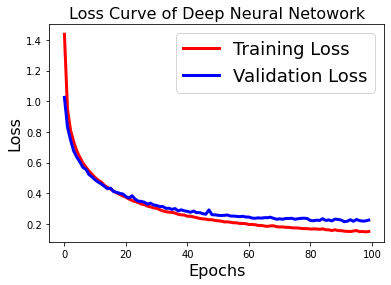

In [24]:
#Loss Curve


plt.plot(figsize = [8,6])

plt.plot(history.history['loss'],'r',linewidth = 3.0)
plt.plot(history.history['val_loss'],'b',linewidth = 3.0)

plt.legend(['Training Loss', 'Validation Loss'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Loss', fontsize = 16)

plt.title('Loss Curve of Deep Neural Netowork' , fontsize = 16 )



Text(0.5, 1.0, 'Accuracy Curve of Deep Neural Netowork')

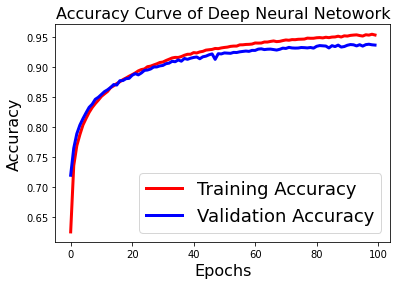

In [25]:
#Accuracy Curve

plt.plot(figsize = [8,6])
plt.plot(history.history['accuracy'],'r',linewidth = 3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth = 3.0)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize = 18)

plt.xlabel('Epochs', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)


plt.title('Accuracy Curve of Deep Neural Netowork' , fontsize = 16 )

##  4.2 Make Predictions

In [26]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)

In [27]:
predictions

array([0, 2, 0, ..., 0, 0, 0], dtype=int64)

#### Transforming from One Hot Encoding

In [28]:
y_test =np.argmax(y_test, axis=1)
y_test[1]

2

In [29]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, predictions)}
print(f"Accuracy is: {accuracy_score(y_test, predictions)* 100}")

Accuracy is: 93.60858685631503


## 4.3 Classification Report

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     37041
           1       0.95      0.93      0.94      2126
           2       0.86      0.92      0.89      2174
           3       0.95      0.95      0.95      2216
           4       0.96      0.94      0.95      2193
           5       0.95      0.91      0.93      2031
           6       0.96      0.90      0.93      2095
           7       0.95      0.87      0.91      2427
           8       0.92      0.85      0.88      2441
           9       0.90      0.81      0.85      2226
          10       0.93      0.81      0.86      2206
          11       0.88      0.88      0.88      2053
          12       0.96      0.92      0.94      2217
          13       0.95      0.86      0.91      1352
          14       0.97      0.89      0.93      1313
          15       0.91      0.87      0.89      1595
          16       0.97      0.95      0.96      1472
 

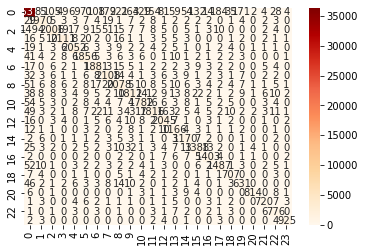

In [30]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, predictions))

cm = confusion_matrix(predictions, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

## 4.4 Evaluation

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5347161859607533
MSE: 6.308270775714474
RMSE: 2.511627117172148


In [32]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, predictions, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, predictions,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, predictions,average='weighted'))

Precision Score :  0.9361464566067925
Recall Score :  0.9360858685631502
f1_score :  0.9353373309585602
